## 붓꽃 데이터 예제를 이용한 K-평균 군집화

In [3]:
# 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# 데이터 가져오기
iris = pd.read_csv('./Data/iris.csv')

In [5]:
# 데이터 컬럼 및 타입 혹인하기
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# 데이터 확인 - head()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# class : 종속변수
# 독립변수는 연속형 변수
# 종속변수는 범주형 변수
# iris 데이터 프레임을 x_iris와 y_iris로 분할
x_iris = iris.drop('class', axis = 1)
y_iris = iris['class']

In [8]:
# 표본 척도를 사용해 세 가지 클러스트 구성
# 실제로는 몇 개의 클러스터가 필요한지 알 수 없다. => 시행착오를 겪어 수를 알아내는 수 밖에 없다.
k_means_fit = KMeans(n_clusters = 3, max_iter = 300)
k_means_fit.fit(x_iris)


KMeans(n_clusters=3)

In [11]:
# crosstab
pd.crosstab(y_iris, k_means_fit.labels_, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1,2
Actual,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,14,36


In [12]:
# silhouette_score
silhouette_score(x_iris, k_means_fit.labels_, metric = 'euclidean')

0.5525919445499757

In [15]:
# 민감도 분석
# 몇 개의 클러스터를 만들어야 더 나은 구분이 가능한지 검사
for k in range(2,10):
    k_means_fitk = KMeans(n_clusters = k, max_iter = 300)
    k_means_fitk.fit(x_iris)
    print('For K value', k, ",Silhouette-score: %0.3f" % silhouette_score(x_iris, k_means_fitk.labels_ , metric = 'euclidean'))

For K value 2 ,Silhouette-score: 0.681
For K value 3 ,Silhouette-score: 0.553
For K value 4 ,Silhouette-score: 0.498
For K value 5 ,Silhouette-score: 0.489
For K value 6 ,Silhouette-score: 0.368
For K value 7 ,Silhouette-score: 0.358
For K value 8 ,Silhouette-score: 0.359
For K value 9 ,Silhouette-score: 0.331


In [16]:
# 경험적으로 실루엣 값이 가장 높은 그 다음 값 k = 3을 선택한다

In [30]:
K = range(1,10)
KM = [KMeans(n_clusters = k).fit(x_iris) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]

In [35]:
cidx = [np.argmin(D, axis = 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]
avgWithinSS = [sum(d)/x_iris.shape[0] for d in dist]

In [36]:
# 평균 클러스터 내 제곱의 합
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x_iris)**2/x_iris.shape[0])
bss = tss - wcss

Text(0, 0.5, 'Average within-cluster sum of squares')

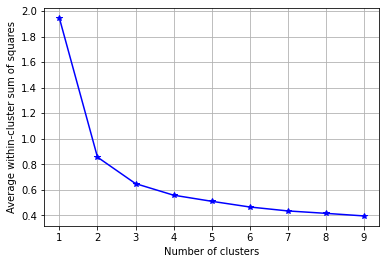

In [38]:
# 엘보 곡선 - 클러스터 내 제곱의 합계 평균
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')

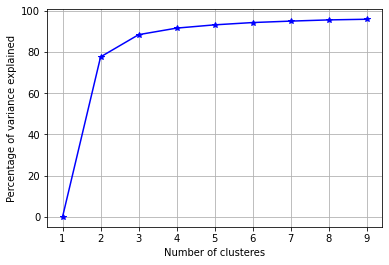

In [39]:
# elbow curve - percentage of variance explained
# 최적의 클러스터 개수로 결정되기 위해서는 이 값의 최소한 80%를 넘어야 한다.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusteres')
plt.ylabel('Percentage of variance explained')
plt.show()